In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
with open("insurance.csv","r")as source:#Reading from insurance.csv and writing into insurance2.scv
    reader=csv.reader(source)
    with open("insurance2.csv","w")as result:
        writer=csv.writer(result)
        for r in reader:
            writer.writerow((r[0],r[2],r[3],r[6]))#Excluding categorical columns from insurance.csv and adding the rest to insurance2.csv

In [2]:
data = np.genfromtxt("insurance2.csv", delimiter=',')

In [4]:
X = data[1:,0:3]#The three columns are in X
X

array([[19.  , 27.9 ,  0.  ],
       [18.  , 33.77,  1.  ],
       [28.  , 33.  ,  3.  ],
       ...,
       [18.  , 36.85,  0.  ],
       [21.  , 25.8 ,  0.  ],
       [61.  , 29.07,  0.  ]])

In [5]:
X = np.concatenate([X, np.ones(len(X))[:, np.newaxis]], axis=1) #We will add one more dimension to X and have the value 1 for that dimension to replace the bias b

In [6]:
y=data[1:,3]#1 diamensional array,4th column in the file

In [7]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [8]:
p=0
mylist=[]#List of Modelling powers
mlist=[]#List of the different set size on which we are training the model
mylist2=[]#List of Generalistaion powers

#Iterate from 20% to 80% of the full data set size to modify the size of Xtrain

Training Set Size: 267
Test set size    : 1071
MSEtest          : 128521337.39998056
MSEtrain         : 136128365.08041513


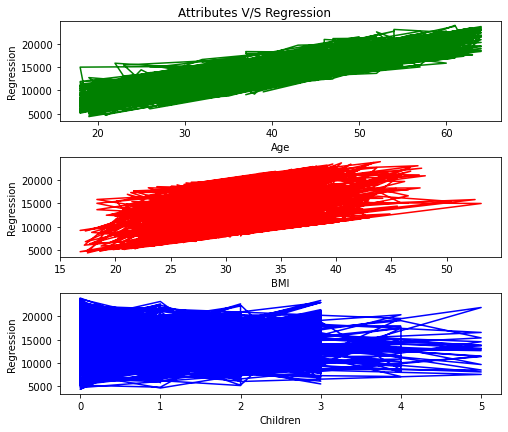

Training Set Size: 401
Test set size    : 937
MSEtest          : 128339641.6444612
MSEtrain         : 131217681.0324069


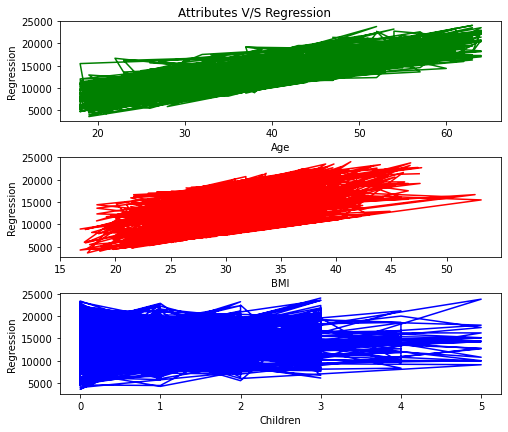

Training Set Size: 535
Test set size    : 803
MSEtest          : 132528444.74770243
MSEtrain         : 124519572.59302647


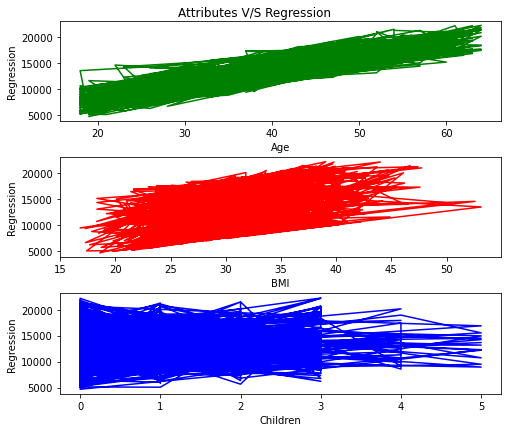

Training Set Size: 669
Test set size    : 669
MSEtest          : 129281199.96482423
MSEtrain         : 129087100.06410158


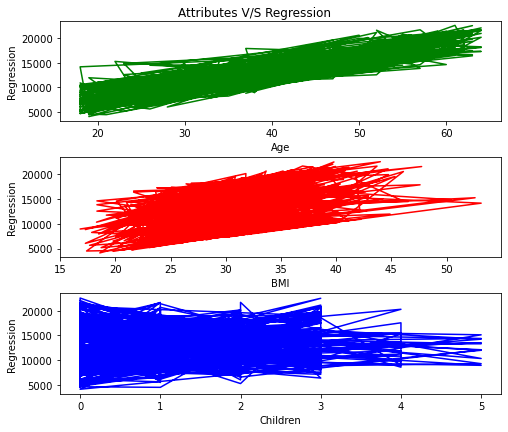

Training Set Size: 802
Test set size    : 536
MSEtest          : 134448836.7955482
MSEtrain         : 125559783.84966026


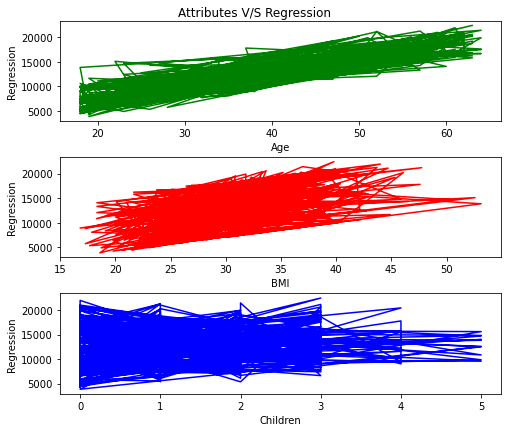

Training Set Size: 936
Test set size    : 402
MSEtest          : 137207726.1906042
MSEtrain         : 125762496.67371511


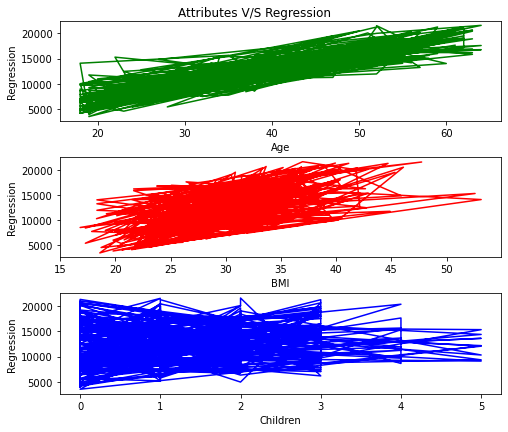

Training Set Size: 1070
Test set size    : 268
MSEtest          : 140499346.18509048
MSEtrain         : 126146511.94100606


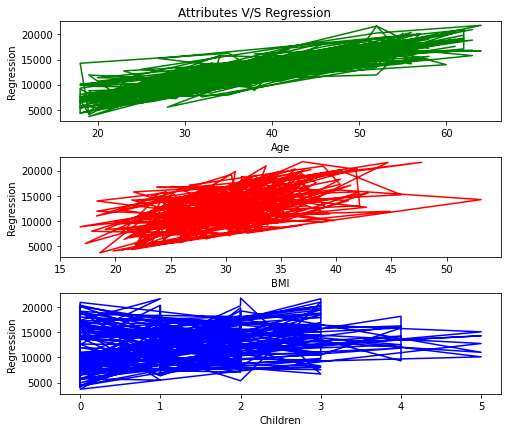

In [49]:
for k in range(2,9):
    m=int((k/10)*len(X))
    print("Training Set Size:", m)
    mlist.append(m)
    Xtrain = X[0:m,:]#Training data set
    ytrain = y[0:m]#Training data set
    Xtest = X[m:,:]#test data set
    ytest = y[m:]#test data set
    target=ytest
    theta=np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(Xtrain), Xtrain)),np.transpose(Xtrain)),ytrain)#Normal equation formula
    predict1 = np.matmul(Xtest, theta)#statement for finding yhat
    print("Test set size    :",len(X)-m)
    MSEtest=  np.matmul(np.subtract(predict1,ytest),np.subtract(predict1,ytest))/(len(X)-m)#Generalistaion power for the training data
    mylist.append(MSEtest)#Adding MSEtest to the list
    print("MSEtest          :",MSEtest)
    predict2=np.matmul(Xtrain,theta)
    MSEtrain=np.matmul(np.subtract(predict2,ytrain),np.subtract(predict2,ytrain))/m #Modeling power for the data
    mylist2.append(MSEtrain)#Adding MSEtrain to the list
    print("MSEtrain         :",MSEtrain)
    
    #Plotting
    fig, axs = plt.subplots(3, 1)
    fig.set_figheight(6)
    fig.set_figwidth(7)
    axs[0].plot(Xtest[:,0],predict1,color='green')#Plotting the age against the linear model with green
    axs[1].plot(Xtest[:,1],predict1,color='red')#Plotting the bmi against the linear model with red
    axs[2].plot(Xtest[:,2],predict1,color='blue')#Plotting the no-of-children against the linear model with blue
    axs[0].set_xlabel('Age')
    axs[0].set_ylabel('Regression')
    axs[1].set_xlabel('BMI')
    axs[1].set_ylabel('Regression')
    axs[2].set_xlabel('Children')
    axs[2].set_ylabel('Regression')
    fig.suptitle('Attributes V/S Regression')
    fig.tight_layout(pad=0.5)
    plt.show()
    

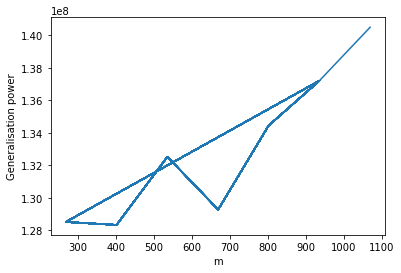

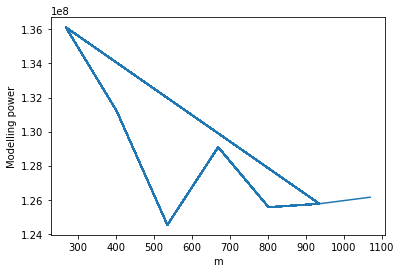

In [50]:
plt.xlabel("m")
plt.ylabel("Generalisation power")
plt.plot(mlist[:],mylist[:])#Plotting generalistion powers against the training set sizes
plt.show()#Displaying the plot
plt.xlabel("m")
plt.ylabel("Modelling power")
plt.plot(mlist[:],mylist2[:])#Plotting the modelling powers against their respective training set sizes
plt.show()#Displaying the plot